# Assignment  week 1

## Notebook made by   (If not filled in correctly: 0 pts for assignment)

__Name(s)__: Arielle

__Student id(s)__ : 10737308

__Email(s)__: armol.96@hotmail.com

### Pledge (taken from [Coursera's Honor Code](https://www.coursera.org/about/terms/honorcode) )



Put here a selfie with your photo where you hold a signed paper with the following text: (if this is team work, put two selfies here). The link must be to some place on the web, not to a local file. **Assignments without the selfies will not be graded and receive 0 points.**

> My answers to homework, quizzes and exams will be my own work (except for assignments that explicitly permit collaboration).

>I will not make solutions to homework, quizzes or exams available to anyone else. This includes both solutions written by me, as well as any official solutions provided by the course staff.

>I will not engage in any other activities that will dishonestly improve my results or dishonestly improve/hurt the results of others.

<img src='link to your selfie'/>

## Questions

#### Book

* Chap 1: all exercises.   

### Your answers here
 
#### Programming

* [MakeInvertedIndex](MakeInvertedIndex1516.html): vragen 1-8  
 
Before you start it is good to experiment with the described steps in [MakeInvertedIndex](MakeInvertedIndex1516.html).

# 0

Create the function `index_collection(folder)` as described in [MakeInvertedIndex](MakeInvertedIndex1516.html)

In [1]:
from collections import Counter,defaultdict
from bs4 import BeautifulSoup
import os
import glob2 as glob
import nltk
import math
from __future__ import division

In [2]:
# Extract Vocabulary as in make an Inverted Index
def index_collection(folder):
    
    MyIndex = defaultdict(Counter) # initialize MyIndex
    
    for infile in glob.glob( os.path.join(folder, '*.xml') ):  # loop over each file
        fileIndex = os.path.basename(infile).replace('.xml','')
        print("current file is: " + fileIndex)
        with open(infile, 'r') as f:  # open file
            soup = BeautifulSoup(f.read(), "xml")  # get the text out
            text = [w.lower() for w in nltk.word_tokenize(soup.get_text())]   # tokenize, lower case
            for w in text:    # update MyIndex with each token 
                MyIndex[w][fileIndex]+=1         
    return MyIndex;

# how many works of shakespeare are there?
def nr_docs(folder):
    return len(glob.glob(os.path.join(folder, '*.xml')))

In [3]:
Myindex = index_collection(r"C:\Users\Isis Roling\Documents\Zoekmachines 2018\shakespeare.2.00.xml")

In [4]:
#nr_docs(r"C:\Users\Isis Roling\Documents\Zoekmachines 2018\shakespeare.2.00.xml")

# 1 

Count the total number of tokens in the works of Shakespeare and the total number of unique tokens.  Answer with two one-liners using the created index.

In [5]:
# hint: look up how you compute the sum of a list of numbers without a for loop or an extra variable

#unique_tokens = len(Myindex.keys())
#print(unique_tokens)

In [6]:
def count_tokens(d):  
    tot_tokens = 0
    for k in d:
        #tot_tokens += sum(d[k].values()) # for every key (token) in the defaultdict, get all the values per document and sum them up
        
        # enhanced for multivalued dictionary
        tot_tokens += sum(d[k][0].values()) # for every key (token) in the defaultdict, get all the values per document and sum them up                                           
    return tot_tokens

# total tokens = count_tokens(index_pre)

# 2

Look at the vocabulary. Is it OK? Propose further normalization, or better tokenization. Also see Chapter 2

In [7]:
#index_pre.keys()
# ja hallo ik ga toch niet al die woordjes af watdafak

# this function includes stuff that should be changed in the inverted index
def clean_up(d) :
    #d.pop("ASCII")
    d.pop('©')
    d.pop(',')
    d.pop('.')
    return d

# 3 

Make a new index where you lower case all words except if each letter in a word is a capital. So 'Caesar' becomes 'caesar', but CAESAR remains the same.

In [8]:
# testing with this piece of code
#a = 'Arielle'
#print(a.isupper())

def index_collection_2(folder):
    MyIndex = defaultdict(Counter) # initialize MyIndex
    for infile in glob.glob( os.path.join(folder, '*.xml') ):  # loop over each file
        fileIndex = os.path.basename(infile).replace('.xml','')
        #print("current file is: " + fileIndex)
        with open(infile, 'r') as f:  # open file
            soup = BeautifulSoup(f.read(), "xml")  # get the text out
            text = [w.lower() if not w.isupper() else w for w in nltk.word_tokenize(soup.get_text()) ]   # tokenize, lower case
            for w in text:    # update MyIndex with each token 
                MyIndex[w][fileIndex]+=1         
    return MyIndex;

Myindex = index_collection_2(r"C:\Users\Isis Roling\Documents\Zoekmachines 2018\shakespeare.2.00.xml")
#Myindex = clean_up(Myindex)

In [9]:
#print(pr_index.keys())
#print(pr_index['A'])


In [10]:
# in these pieces of code, 'titus' is a word (not the document titus)
print(Myindex['titus'])

print('N is ', len(Myindex['titus'].keys()))

print(Myindex['titus'].values()) # is a list 
print(sum(Myindex['titus'].values())) # collection frequency

print(Myindex['titus']) # is a counter

print('I want to see the value 47 ', Myindex['titus']['titus'])

Counter()
N is  0
dict_values([])
0
Counter()
I want to see the value 47  0


In [11]:
print([Myindex['titus']]) # this works to convert value as dictionary to value as a list containing a dictionary


[Counter()]


# 4 

Calculate the document frequency (in how many documents occurs the term) for each term and the corpus frequency (how often does the term occur in the corpus) for each term. Add these two values as new values in your inverted index. 
You can use several data-structures for this: a "JSON like dict", or a "CSV-like" triple. Choose what you like best.

In [12]:
# document frequency for each term

# option a, create new dictionary for the document frequencies only
#df_dict = {t : df(t, Myindex) for t in Myindex} 

# document frequency function per term returns one integer 
def df_t(t, dic): 
    return len(dic[t].keys())

# corpus/collection frequency per term returns one integer: 
def cf_t(t, dic):
    return sum(dic[t].values())

# option b, add values df and cf to key-value pair
Myindex = {t: [Myindex[t], df_t(t, Myindex), cf_t(t, Myindex)] for t in Myindex}

In [13]:
# document frequency list 
def df_list(dic):
    return [dic[t][1] for t in Myindex]
# collection frequency list
def cf_list(dic):
    return [dic[t][2] for t in Myindex]

In [14]:
df = df_list(Myindex)
cf= cf_list(Myindex)

In [17]:
# test

print(Myindex['the'])
print(Myindex['thou'][0].values())
print(Myindex['thou'][2])

#test = [Myindex[t][1] for t in Myindex]
#print(test)


KeyError: 'the'

# 5 

Create a function which from the enhanced index from the previous question produces a table with the following information:
<pre>
                    size of the vocabulary
                    nr of terms with corpus frequency 1
                    nr of terms with document frequency 1
                    nr of terms with document frequency  equal to the number of documents in the corpus
                    nr of terms with document frequency  half or more than the number of documents in the corpus
</pre>     

In [18]:
def info_table(index, df, cf, c_length, size_voc):
    i = size_voc
    ii = sum([int(cf[i] == 1) for i in range(len(cf))])
    iii = sum([int(df[i] == 1) for i in range(len(df))])
    iv = sum([int(df[i] == c_length) for i in range(len(df))])
    v = sum([int(df[i] >= round(0.5* c_length)) for i in range(len(df))])
    NestedList = [["size of the vocabulary", i],
                  ["nr of terms with collection frequency 1", ii],
                  ["nr of terms with document frequency 1", iii], 
                  ["nr of terms with document frequency equal to # documents in the corpus", iv],
                  ["nr of terms with document frequency half or more than the # documents in the collection", v]]
    for item in NestedList:
        print("|", item[0], " " * (87 - len(item[0])), "|",
              item[1], " " * (8 - len( str(item[1]) )), "|")
    return

In [19]:
shakespeare_folder = r"C:\Users\Isis Roling\Documents\Zoekmachines 2018\shakespeare.2.00.xml"
info_table(Myindex, df, cf, nr_docs(shakespeare_folder), count_tokens(Myindex))

| size of the vocabulary                                                                   | 0         |
| nr of terms with collection frequency 1                                                  | 0         |
| nr of terms with document frequency 1                                                    | 0         |
| nr of terms with document frequency equal to # documents in the corpus                   | 1         |
| nr of terms with document frequency half or more than the # documents in the collection  | 1         |


In [ ]:
a = [int(cf[i] == 1) for i in range(len(cf))]

#print(a)
len("nr of terms with document frequency half or more than the # documents in the collection")

# 6 

<strong>Zipf law</strong>
            Look up what Zipf's law means in Wikipedia or in the book. Now show that it holds or not for our corpus.
            Do that as follows: (instead of a csv file you can of course use a Python datastructure and use Python's pyplot to do the plotting.)
 
<ul>

   <li>Create a csv file containing the  corpus frequency of each word. Create
      a row for every word in the vocabulary.
   </li>

   <li>Order the file by corpus frequency descending.</li>

   <li>Add an additional column with row (line)-numbers. </li>

   <li>Plot the logarithm of the row-number on the x-axis versus the logarithm of the corpus
      frequency on the y-axis.  See the code below using `pandas` or use these bash oneliners 
      <br>
       
      <pre>
        bash-3.2$ cat hamlet.txt | sed 's/.*://'|sort -nr|head
1145
967
745
673
564
546
533
513
465
438
bash-3.2$ gnuplot -persist &lt;(echo -e 'plot "-" with lines\n';cat hamlet.txt | sed 's/.*://'|sort -nr| awk '{print log(NR) " " log($1)}')
</pre>
     </li>

   <li>Compare your plot to the  Zipf plots on Wikipedia.
       </li>

</ul>

In [ ]:
'''import csv
from operator import itemgetter

with open('corpus_frequencies.csv', 'w') as f:
    filewriter = csv.writer(f, delimiter=',')#, quotechar='|', quoting=csv.QUOTE_MINIMAL)
    for t in Myindex:
        filewriter.writerow([t, Myindex[t][2]])
    
with open('corpus_frequencies.csv', 'r+') as f:
    data = csv.reader(f, delimiter = ',')
    sortedlist = sorted(data, key=itemgetter(1), reverse=True)
    for row in sortedlist:
        filewriter.writerow(row)

data= csv.reader(open("corpus_frequencies.csv"), delimiter=',')
sortedlist = sorted(data, key=itemgetter(1), reverse=True)'''

In [20]:
from operator import itemgetter
import numpy as np
import csv

cf_matrix = [[t, Myindex[t][2]] for t in Myindex.keys()]
sorted_stuff = sorted(cf_matrix, key=itemgetter(1), reverse=True)
cf_matrix = [[i, sorted_stuff[i][0], sorted_stuff[i][1]] for i in range(len(cf_matrix))]
tf_i = [sorted_stuff[i][1] for i in range(len(sorted_stuff))]

with open('corrpus_frequencies.csv', 'w') as f:
    filewriter = csv.writer(f, delimiter =',')
    filewriter.writerows(cf_matrix)
    
#cf_matrix_vectors= [[1:len(cf_matrix)],[sorted_stuff[i][0] for i in range(len(cf_matrix))], [sorted_stuff[i][0] for i in range(len(cf_matrix))]]    

In [21]:
tf_i

[0]

0    1145
1     967
2     745
3     673
4     564
5     546
6     533
7     513
8     465
9     438
dtype: int32


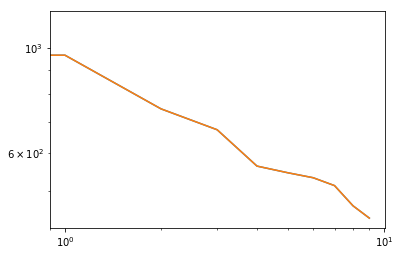

In [22]:
import pandas as pd 
%matplotlib inline

a='''1145
967
745
673
564
546
533
513
465
438'''

H=pd.Series(a.split('\n')).astype(int)
print(H)
H
H.plot();
H.plot(loglog=True);

#df = pd.read_csv('corrpus_frequencies.csv')
#A= pd.Series(df[df.columns[2]].astype(int))
#print(A)
#A = pd.Series(tf_i)
#A.plot(loglog=True);

# 7 

Download all Questions to Parliament (kamervragen) from <a href="http://maartenmarx.nl/teaching/zoekmachines/Data/kvr.zip">http://maartenmarx.nl/teaching/zoekmachines/Data/kvr.zip</a> and do everything you did above for Shakespeare again for this corpus.
            
<p><strong>Note</strong> Depending on the computer you use, you may need to implement the block merging step from Figure 4.3. </p>
At least answer the following queries:

<ol>

   <li>What is the size in GB of all kamervragen?
       </li>

   <li>How much reduces this when you delete all markup?
       </li>

   <li>Wat is the size of the index?
       </li>

   <li>Time all steps and put them in a table. 

      </li>

</ol>


In [ ]:
##
# A couple of pointers to get you started:
#  * Create a separate function to read the data and construct an index
#  * Make sure to apply basic tokenization, lowercasing, etc.
# 
# The exercises below each specify a function that you can implement. Try
# not to do redo work. With proper generic functions defined here you can
# achieve very small implementations below. Any variables and functions
# defined here are also accessible within the answer fields below.
# 
# Switching between the Shakespeare or Motie collection should be
# relatively easy. It is not necessary to duplicate your entire code base
# merely to use a different collection. Think about parts of your code
# that will be the same, regardless of the underlying data set.
# 


## 8 Boolean Search

We will now make a Boolean search engine as described in Chapter 1. First do these exercises for your Shakespeare collection and then do them also for your set of Motie files.

### 8.1 Boolean negation search

Input: one word. Output: all documents which do NOT contain the word.

In [ ]:
def booleanSearchNOT(word):
    """
    This function takes a string as input and prints all document ids
    which do NOT contain the word.
    """
    folder = r"C:\Users\Isis Roling\Documents\Zoekmachines 2018\shakespeare.2.00.xml"
    # Your implementation here
    for infile in glob.glob( os.path.join(folder, '*.xml') ):  # loop over files
        fileIndex = os.path.basename(infile).replace('.xml','')
        if fileIndex not in Myindex[word][0].keys():
            print(fileIndex)


booleanSearchNOT('mum')

### 8.2 Boolean OR search
Input: a string of words. Output: all documents which contain at least one of the words. 
You may choose your own input format for the string. 
Be sure not to include DocID's more often than once.

In [ ]:
def booleanSearchOR(query):
    """
    This function takes a query as input and prints all document ids which
    contain at least one of the words.
    """
    
    # Your implemention here...
    

### 8.3 Ranked boolean search
A Boolean search engine is not supposed to rank the documents it returns, but we can do that anyway.

#### 8.3.1 Most-words first
Rank the documents returned for the OR-query in last question as follows: documents which match most words are returned first. Print the document ID's followed by the number of matching words (i.e. the "score" of the document for this query).

In [ ]:
def booleanSearchMatch(query):
    """
    This function takes a query as input and prints all document ids and
    scores of documents which contain at least one of the words. Documents
    are ranked such that documents that match the most words are returned
    first.
    """
    
    # Your implementation here...

#### 8.3.2 Term-frequency sum
Now rank the documents by the sum of the term frequencies for all query words. Print doc ID's and scores.

In [ ]:
def booleanSearchSumTF(query):
    """
    This function takes a query as input and prints all document ids and
    scores of documents which contain at least one of the words. Documents
    are ranked by the sum of the term frequencies of all query words.
    """
    
    # Your implementation here...

#### 8.3.3 Combined
Now combine the two rankings. First rank on number of matching search terms, and then on the sum of the term counts. Print both scores for each DocID.

In [ ]:
def booleanSearchCombined(query):
    """
    This function takes a query as input and prints all document ids and
    scores of documents which contain at least one of the words. Documents
    are ranked first on the number of matching search terms, and then on
    the sum of the term frequency counts.
    """
    
    # Your implementation here...

### 8.4 Boolean AND search
Input: a string of words. Output: all documents which contain ALL of the words. 
You may choose your own input format for the string.

In [ ]:
def booleanSearchAND(query):
    """
    This function takes a query as input and prints all document ids which
    contain ALL the words.
    """
    
    # Your implementation here...

### 8.5 Ranked Boolean AND search
How would you implement a ranking for the Boolean AND?

> Your answer here

### 8.6 Relaxed boolean AND search

How can you implement a "relaxed version" of Boolean AND, in which you also give results if not ALL query words are present, but as much as possible? Of course you want to rank the documents again.

> Your answer here